Customer Churn Prediction Using Word Embeddings, Algorithm Category : Supervised Learning, Algorithm Name : Random Forest

1) Importing Necessary Libraries Numpy, Pandas, Sci-kit Learn, Matplotlib

In [204]:
# Importing Libraries

# Utitlity Libraries
import numpy as np
import pandas as pd

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithm, Evaluation, and Model Libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,precision_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler

2) Data Gathering from kaggle https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

3) Loading DataSet using Pandas

In [205]:
# Importing Dataset
df = pd.read_csv("C:\\Users\\PramelaRaaj\\Churn_Modelling.csv")


In [206]:
#printing data
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [207]:
#printing 1st 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [208]:
#printing last 5 rows
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [209]:
#printing information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [216]:
#getting shape
df.shape

(10000, 12)

4) Feature Selection - fetching attributes that contributes for the prediction

In [210]:
#removing irrelevant attributes
df.drop(['CustomerId','Gender','Surname'], axis=1, inplace=True)
df.columns

Index(['RowNumber', 'CreditScore', 'Geography', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [211]:
# Resampling
a= df[df.Exited== 0]
b = df[df.Exited == 1]

sampled = b.sample(n=len(a), replace=True, random_state=42)
print(len(sampled))


7963


In [212]:
# Scale features using statistics that are robust to outliers.
def robust(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)


In [213]:
list=["Geography"]
df = pd.get_dummies(df, columns =list, drop_first = True)
df

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0,0,0
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,9998,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [214]:
modified = ["Geography_Germany","Geography_Spain","Geography_France"]
num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) <= 10]
scale = [col for col in df.columns if col not in modified
                   and col not in "Exited"
                   and col not in num]

for col in scale:
    df[col] = robust(df[col])

In [215]:
df

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,-1.000,-0.246,0.417,-0.75,-0.761,1,1,1,0.012,1,0,0
1,-1.000,-0.328,0.333,-1.00,-0.105,1,0,1,0.126,0,0,1
2,-1.000,-1.119,0.417,0.75,0.489,3,1,0,0.140,1,0,0
3,-0.999,0.351,0.167,-1.00,-0.761,2,0,0,-0.065,0,0,0
4,-0.999,1.478,0.500,-0.75,0.222,1,1,1,-0.215,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.999,0.888,0.167,0.00,-0.761,2,1,0,-0.040,0,0,0
9996,0.999,-1.015,-0.167,1.25,-0.312,1,1,1,0.015,0,0,0
9997,1.000,0.425,-0.083,0.50,-0.761,1,0,1,-0.591,1,0,0
9998,1.000,0.896,0.417,-0.50,-0.173,2,1,0,-0.074,1,1,0


5) Split the Dataset as Training Data (80%) and Testing Data (20%)

In [191]:
from sklearn.model_selection import train_test_split
x = df.drop(['Exited'], axis=1) #features (independent variables)
y = df['Exited'] #target (dependent variable)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)


In [192]:
#x_train data contains CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary to be trained 
x_train

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
2694,-0.461,-0.179,-0.667,-0.50,0.125,2,0,1,0.250,1,0
5140,0.028,-0.194,-0.667,-0.25,0.067,2,0,0,-0.601,0,0
2568,-0.486,-0.299,0.833,0.25,0.257,1,1,1,-0.553,1,0
3671,-0.266,-0.045,1.250,0.25,0.114,2,0,1,-0.323,1,0
7427,0.486,0.463,-0.333,0.75,0.194,1,0,0,0.633,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.421,-0.231,0.833,0.50,0.080,1,1,1,-0.339,1,0
7813,0.563,0.239,2.167,-0.50,-0.125,1,1,0,-0.311,1,0
905,-0.819,0.149,0.667,1.00,-0.761,1,1,1,-0.083,0,0
5192,0.039,0.082,0.167,0.75,-0.761,2,1,1,0.010,0,0


In [193]:
#x_test data contains CreditScore,Age,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary to be trained 
x_test

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
9953,0.991,-0.761,0.833,-0.75,-0.761,2,1,1,-0.032,0,0
3850,-0.230,0.209,-0.250,-0.50,0.361,1,1,0,-0.342,0,0
4962,-0.008,-0.903,0.417,-0.75,-0.761,2,0,1,-0.098,0,0
3886,-0.223,0.433,-0.250,0.75,0.397,2,0,1,-1.003,1,0
5437,0.088,-0.813,-0.583,0.25,-0.186,1,1,1,0.778,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3919,-0.216,0.828,0.167,0.50,-0.761,2,1,0,-0.821,0,1
162,-0.968,1.104,1.000,0.50,0.085,1,0,0,-0.539,0,0
7903,0.581,-0.634,-0.250,1.25,-0.761,2,0,1,0.624,0,1
2242,-0.552,-0.231,-0.583,-0.75,0.030,2,1,1,0.661,1,0


In [194]:
#y_train data contains Exited(yes/no) to be trained 
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [195]:
#y_test data contains Exited(yes/no) to be trained 
y_test

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
3919    0
162     0
7903    0
2242    0
2745    0
Name: Exited, Length: 2000, dtype: int64

In [196]:
#prints total no of rows in category of Exited
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

6) Generating Model

In [197]:
# Random Forest
# Creating Model
rf = RandomForestClassifier(n_estimators=250, max_depth=18)
# Fitting Model
rf.fit(x_train, y_train)
# Predicting the response
pred_test = rf.predict(x_test)

7) Model Evaluation using Metrics(Accuracy , Precision , Recall , F1 score)

In [198]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy using RandomForest model is {} %".format(accuracy_score(y_test, pred_test) * 100))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision using RandomForest model is {} %". format(precision_score(y_test,pred_test)* 100))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall using RandomForest model is {} %" . format(recall_score(y_test,pred_test)* 100))
print("F1 score using RandomForest model :{} %" . format(f1_score(y_test,pred_test)* 100))

Accuracy using RandomForest model is 86.35000000000001 %
Precision using RandomForest model is 81.41592920353983 %
Recall using RandomForest model is 44.33734939759036 %
F1 score using RandomForest model :57.410296411856464 %


Accuracy of RandomForest clasifier:86.35000000000001%

 [[1543   42]
 [ 231  184]]


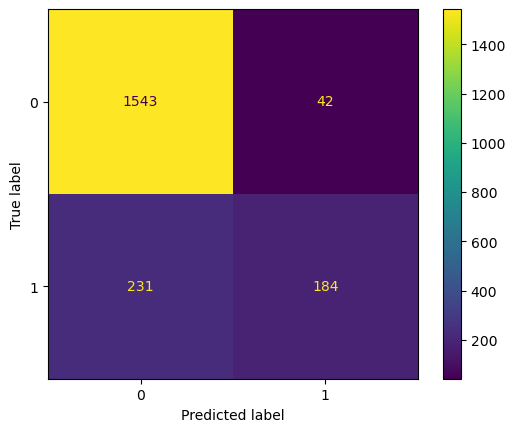

In [199]:
confusionmatrix = confusion_matrix(y_test, pred_test)
print("Accuracy of RandomForest clasifier:{}%".format(accuracy_score(y_test, pred_test) * 100))
print("\n", confusionmatrix)
conf = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix)
conf.plot()
plt.show()

In [200]:
cm = np.array(confusion_matrix(y_test,pred_test, labels=[1,0]))
c_matrix = pd.DataFrame(cm, index=['Exited', 'Not Exited'],columns=['Predicted Exited','Predicted Not Exited'])
c_matrix

,Predicted Exited,Predicted Not Exited
Exited,184,231
Not Exited,42,1543


In [201]:
print("Classification Report")
print(classification_report(y_test,pred_test))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.81      0.44      0.57       415

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



8) Data Visualization using Bar Chart

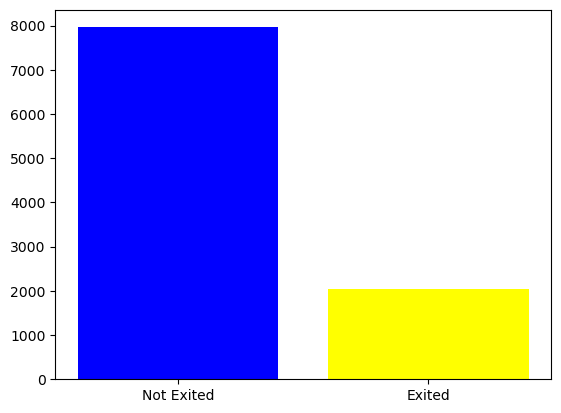

In [202]:
count_Class = pd.value_counts(df.Exited, sort = True)

# Data to Plot
labels = 'Not Exited', 'Exited'
sizes = [count_Class[0], count_Class[1]]
colors = ['blue', 'yellow']
explode = (0.1, 0.1)

# Plot
plt.bar(labels,sizes,color=colors)
plt.show()